In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression :first machine learning algorithm we are learning

In [2]:
#simple linear regression(ols=ordinary least square):limited to just one feature

In [3]:
df=pd.read_csv("C:\\Users\\Vandana Jha\\Downloads\\Advertising.csv")

In [4]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
#we have three featuresas of now that is tv radio and newspaper ..simple linear 
#regression cant work with the three so we combine all three in one as total spent in advertisement

In [6]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']

In [7]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

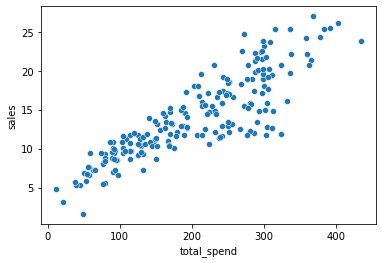

In [8]:
sns.scatterplot(data=df,x='total_spend',y='sales')
#we notice the more we spend more is the sales (positive results)

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

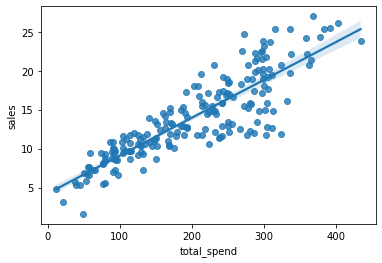

In [9]:
sns.regplot(data=df,x='total_spend',y='sales')

In [10]:
X=df['total_spend']
y=df['sales']

In [11]:
#solvig ols
#y=mx+b
#y=B1x+B0
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [12]:
np.polyfit(X,y,deg=1)
#the two outputs are beta co effecients B1 and B0

array([0.04868788, 4.24302822])

In [13]:
#now we can predict the sales for any value

In [14]:
potential_spend=np.linspace(0,500,100)

In [15]:
predicted_sales=0.04868788*potential_spend + 4.24302822

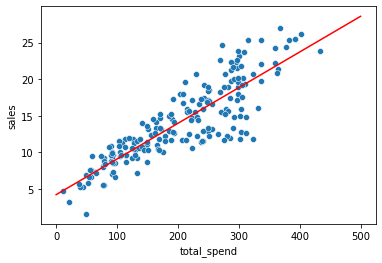

In [16]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

In [17]:
potential_spend=200
predicted_scales=0.04868788*potential_spend + 4.24302822

In [18]:
predicted_scales

13.98060422

# scikit learn=library consisting vaious ml algorithms

In [19]:
#scikit learn for supervised machine learning process

In [20]:
df=pd.read_csv("C:\\Users\\Vandana Jha\\Downloads\\Advertising.csv")

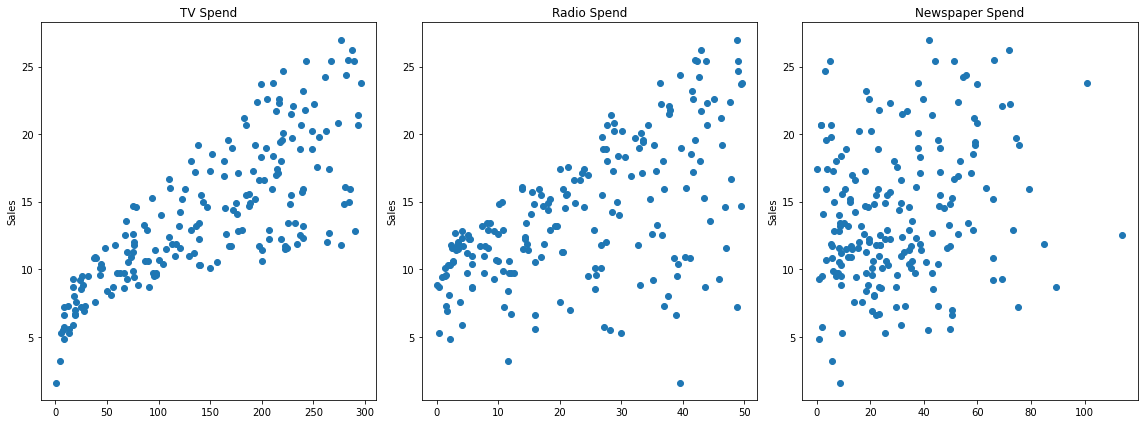

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [22]:
X=df.drop('sales',axis=1)
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [23]:
y=df['sales']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [26]:
len(df)

200

In [27]:
X_train

,TV,radio,newspaper
169,284.3,10.6,6.4
97,184.9,21.0,22.0
31,112.9,17.4,38.6
12,23.8,35.1,65.9
35,290.7,4.1,8.5
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [28]:
y_train

169    15.0
97     15.5
31     11.9
12      9.2
35     12.8
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 140, dtype: float64

In [29]:
len(X_test)

60

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model=LinearRegression()

In [32]:
model.fit(X_train,y_train)

LinearRegression()

In [33]:
test_predictions=model.predict(X_test)
test_predictions

array([16.5653963 , 21.18822792, 21.55107058, 10.88923816, 22.20231988,
       13.35556872, 21.19692502,  7.35028523, 13.27547079, 15.12449511,
        9.01443026,  6.52542825, 14.30205991,  8.97026042,  9.45679576,
       12.00454351,  8.91549403, 16.15619251, 10.29582883, 18.72473553,
       19.76821818, 13.77469028, 12.49638908, 21.53501762,  7.60860741,
        5.6119801 , 20.91759483, 11.80627665,  9.08076637,  8.51412012,
       12.17604891,  9.9691939 , 21.73008956, 12.77770578, 18.1011362 ,
       20.07590796, 14.26202556, 20.93826535, 10.83938827,  4.38190607,
        9.51332406, 12.40486324, 10.17045434,  8.09081363, 13.16388427,
        5.2243552 ,  9.28893833, 14.09330719,  8.69024497, 11.66119763,
       15.71848432, 11.63156862, 13.35360735, 11.1531472 ,  6.33636845,
        9.76157954,  9.4195714 , 24.25516546,  7.69519137, 12.15317572])

In [34]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
#metrics to check if the prediciton is correct using errors

In [35]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

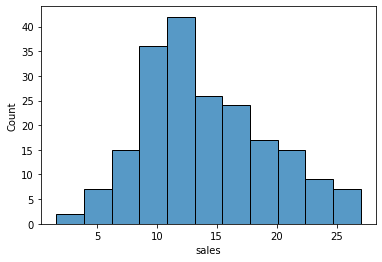

In [36]:
sns.histplot(data=df,x='sales')

In [37]:
mean_absolute_error(y_test,test_predictions)

1.5116692224549084

In [38]:
mean_squared_error(y_test,test_predictions)

3.7967972367152183

In [39]:
#root mean squared error
np.sqrt(mean_squared_error(y_test,test_predictions))

1.9485372043446383

# residual(y-y^) plots
#plotting residual errors vs true y value

In [40]:
test_residuals=y_test-test_predictions
test_residuals

95     0.334604
15     1.211772
30    -0.151071
158   -3.589238
128    2.497680
115   -0.755569
69     1.103075
170    1.049715
174   -1.775471
45    -0.224495
66     0.485570
182    2.174572
165   -2.402060
78    -3.670260
186    0.843204
177   -0.304544
56    -3.415494
152    0.443807
82     1.004171
68     0.175264
124   -0.068218
16    -1.274690
148   -1.596389
93     0.664982
65     1.691393
60     2.488020
84     0.782405
67     1.593723
125    1.519234
132   -2.814120
9     -1.576049
18     1.330806
55     1.969910
75    -4.077706
150   -2.001136
104    0.624092
135   -2.662026
137   -0.138265
164    1.060612
76     2.518094
79     1.486676
197    0.395137
38    -0.070454
24     1.609186
122   -1.563884
195    2.375645
29     1.211062
19     0.506693
143    1.709755
86     0.338802
114   -1.118484
173    0.068431
5     -6.153607
126   -4.553147
117    3.063632
73     1.238420
140    1.480429
98     1.144835
172   -0.095191
96    -0.453176
Name: sales, dtype: float64

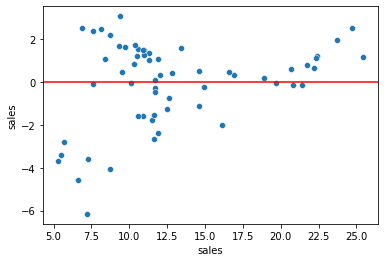

In [41]:
sns.scatterplot(x=y_test,y=test_residuals)
plt.axhline(y=0,color='red')

In [42]:
#the graph looks absolutely random thus we should not use linear regression

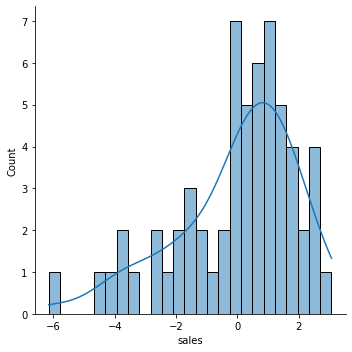

In [43]:
#what we actually wanted
sns.displot(test_residuals,bins=25,kde=True)

In [44]:
import scipy as sp

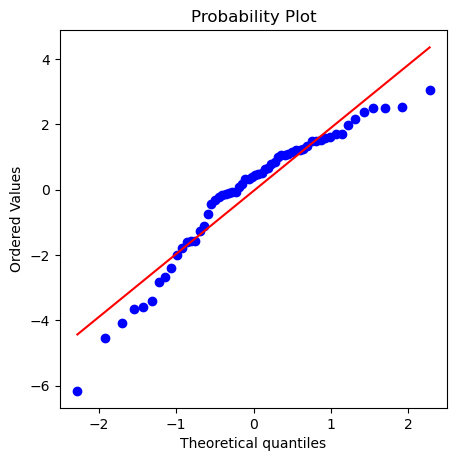

In [45]:
#create a figure and axes to plot on
fig,ax=plt.subplots(figsize=(5,5),dpi=100)
#probplot returns the raw values if needed 
#we just want to see the plot,so we assign these values to_
_=sp.stats.probplot(test_residuals,plot=ax)

# model deployment

In [46]:
final_model=LinearRegression()

In [47]:
final_model.fit(X,y)

LinearRegression()

In [48]:
final_model.coef_
#reports back the beta coefficients

array([ 0.04576465,  0.18853002, -0.00103749])

In [49]:
y_hat=final_model.predict(X)

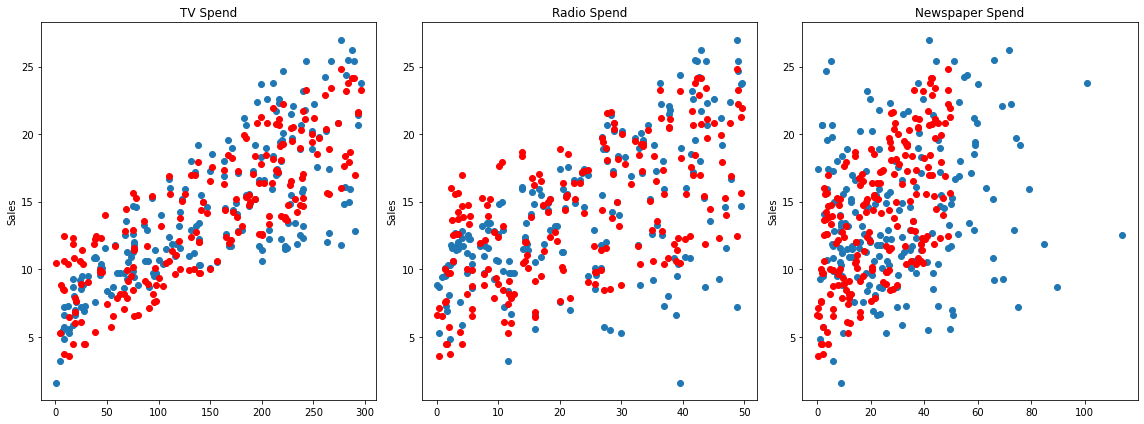

In [50]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['radio'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

In [51]:
from joblib import dump,load

In [52]:
dump(final_model,'final_sales_model.joblib')

['final_sales_model.joblib']

In [53]:
loaded_model=load('final_sales_model.joblib')

In [54]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [55]:
X.shape

(200, 3)

In [56]:
#149 TV,22 Radio,12 Newspaper
#sales=?
campaign=[[149,22,12]]

In [57]:
loaded_model.predict(campaign)

array([13.893032])

# POLYNOMIAL REGRESSION

In [58]:
#creating polynomial features

In [59]:
X=df.drop('sales',axis=1)

In [60]:
y=df['sales']

In [61]:
from sklearn.preprocessing import PolynomialFeatures

In [62]:
polynomial_converter=PolynomialFeatures(degree=2,include_bias=False)

In [63]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [64]:
poly_features=polynomial_converter.transform(X)
poly_features

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [65]:
polynomial_converter.transform(X).shape

(200, 9)

In [66]:
X.shape

(200, 3)

In [67]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [68]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state=42)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
model=LinearRegression()

In [73]:
model.fit(X_train,y_train)

LinearRegression()

In [74]:
test_predictions=model.predict(X_test)

In [75]:
model.coef_

array([ 0.05478172,  0.01311214,  0.01086391, -0.00011074,  0.00108048,
       -0.00010764,  0.00030191,  0.00017541,  0.00010075])

In [76]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [77]:
MAE=mean_absolute_error(y_test,test_predictions)

In [78]:
MSE=mean_squared_error(y_test,test_predictions)

In [79]:
RSE=np.sqrt(MSE)

In [80]:
MAE

0.5905974833808008

In [81]:
RSE

0.7233218473857531

In [82]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [83]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

BIAS VARIANCE TRADE-OFF

In [84]:
#increasing model complexity(polynomial degree) reduces the error in an ideal situation
#underfit and overfit models

choosing the correct degree

In [85]:
#create the different order polynomial
#split poly feat train/test
#fit on train
#store/save the root mean square error for both the train and test set
#plot the results (error vs poly deree)

In [86]:
train_rmse_errors=[]
test_rmse_errors=[]


for d in range(1,10):
    
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    
    poly_features=poly_converter.fit_transform(X)
    X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state=42)
    
    model=LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred=model.predict(X_train)
    test_pred=model.predict(X_test)
    
    train_rmse=np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse=np.sqrt(mean_squared_error(y_test,test_pred))
    
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    
    
    

In [87]:
train_rmse_errors

[1.574596830590544,
 0.5950712355838925,
 0.4688758111822086,
 0.36946897017715674,
 0.24382206827180572,
 0.19737747791436286,
 0.42552782227379454,
 0.15782447559939888,
 0.16640536093291597]

In [88]:
test_rmse_errors

[1.9485372043446383,
 0.7233218473857531,
 0.5392350985609965,
 1.3032265967218177,
 5.946670177318908,
 25.96451684336015,
 634.4709144546548,
 2697.781178413146,
 133221.04828871827]

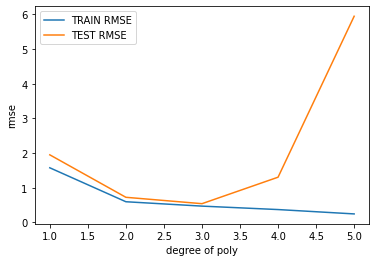

In [89]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.xlabel('degree of poly')
plt.ylabel('rmse')
plt.legend()

In [90]:
#second degree poly or third degree poly best fits here

In [91]:
final_poly_converter=PolynomialFeatures(degree=3,include_bias=False)

In [92]:
final_model=LinearRegression()

In [93]:
full_converted_X=final_poly_converter.fit_transform(X)
final_model.fit(full_converted_X,y)

LinearRegression()

In [94]:
from joblib import dump,load

In [95]:
dump(final_model,'final_model.joblib')

['final_model.joblib']

In [96]:
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [97]:
loaded_converter=load('final_converter.joblib')

In [98]:
loaded_model=load('final_model.joblib')

In [99]:
campaign=[[149,22,12]]

In [100]:
transformed_data=loaded_converter.fit_transform(campaign)

In [101]:
loaded_model.predict(transformed_data)

array([14.64501014])

In [102]:
X=df.drop('sales',axis=1)

In [103]:
y=df['sales']

In [104]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
polynomial_converter=PolynomialFeatures(degree=3,include_bias=False)

In [106]:
poly_features=polynomial_converter.fit_transform(X)

In [107]:
poly_features.shape

(200, 19)

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test = train_test_split(poly_features,y,test_size=0.3,random_state=42)

In [110]:
X_train.shape

(140, 19)

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
scaler=StandardScaler()

In [113]:
scaler.fit(X_train)

StandardScaler()

In [114]:
X_train=scaler.transform(X_train)

In [115]:
X_test=scaler.transform(X_test)

In [116]:
X_train[0]

array([ 1.53003874, -0.8862929 , -1.16598019,  1.93705409, -0.22476356,
       -0.62651363, -0.90793157, -0.850692  , -0.81317305,  2.23096225,
        0.10749852, -0.35876444, -0.61820397, -0.60530328, -0.5751799 ,
       -0.81381745, -0.72447935, -0.64260728, -0.56741817])

In [117]:
poly_features[0]

array([2.30100000e+02, 3.78000000e+01, 6.92000000e+01, 5.29460100e+04,
       8.69778000e+03, 1.59229200e+04, 1.42884000e+03, 2.61576000e+03,
       4.78864000e+03, 1.21828769e+07, 2.00135918e+06, 3.66386389e+06,
       3.28776084e+05, 6.01886376e+05, 1.10186606e+06, 5.40101520e+04,
       9.88757280e+04, 1.81010592e+05, 3.31373888e+05])

RIDGE REGRESSION (FIRST REGULARISATION TECHNIQUE (L2))

In [118]:
from sklearn.linear_model import Ridge

In [119]:
ridge_model=Ridge(alpha=10)

In [120]:
ridge_model.fit(X_train,y_train)

Ridge(alpha=10)

In [121]:
test_predictions=ridge_model.predict(X_test)

In [122]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [123]:
MAE=mean_absolute_error(y_test,test_predictions)

In [124]:
MAE

0.6296591346758601

In [125]:
RMSE=np.sqrt(mean_squared_error(y_test,test_predictions))

In [126]:
RMSE

0.8916327541710896

In [128]:
from sklearn.linear_model import RidgeCV
#perform cross validation for alpha values

In [129]:
ridge_cv_model=RidgeCV(alphas=(0.1,1.0,10.0))

In [137]:
ridge_cv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [131]:
ridge_cv_model.alpha_

0.1

In [134]:
from sklearn.metrics import SCORERS

In [136]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [139]:
test_predictions=ridge_cv_model.predict(X_test)

In [140]:
MAE=mean_absolute_error(y_test,test_predictions)

In [141]:
MAE

0.46671241132084407

In [142]:
RMSE=np.sqrt(mean_squared_error(y_test,test_predictions))

In [143]:
RMSE

0.5945136671856113

In [144]:
ridge_cv_model.coef_

array([ 5.90523815,  0.46316396,  0.68028713, -6.17743395,  3.73671928,
       -1.40708382,  0.00624704,  0.11128917, -0.2617823 ,  2.17135744,
       -0.51480159,  0.70587211,  0.60311504, -0.53271216,  0.5716495 ,
       -0.34685826,  0.36744388, -0.03938079, -0.12192939])

LASSO REGULARISSATION (L1)

In [146]:
from sklearn.linear_model import LassoCV

In [152]:
lasso_cv_model=LassoCV(eps=0.1,n_alphas=100)

In [153]:
lasso_cv_model.fit(X_train,y_train)

LassoCV(eps=0.1)

In [154]:
lasso_cv_model.alpha_

0.4924531806474871

In [160]:
test_predictions=lasso_cv_model.predict(X_test)

In [161]:
MAE=mean_absolute_error(y_test,test_predictions)

In [162]:
MAE

0.6811456342837983

In [163]:
RMSE=np.sqrt(mean_squared_error(y_test,test_predictions))

In [164]:
RMSE

1.0349127365478727

In [165]:
lasso_cv_model.coef_
#almost all are zero,thus performing well and can easily be interpreted

array([0.97675148, 0.        , 0.        , 0.        , 3.8148913 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

ELASTIC NET (L1 AND L2)

In [167]:
from sklearn.linear_model import ElasticNetCV

In [169]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7,.9, .95, .99, 1],tol=0.01)

In [170]:
elastic_model.fit(X_train,y_train)

ElasticNetCV(l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1], tol=0.01)

In [171]:
elastic_model.l1_ratio_

0.95

In [172]:
test_predictions = elastic_model.predict(X_test)

In [173]:
MAE= mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [174]:
MAE

0.6383683427025824

In [175]:
RMSE

0.7707991875643564

In [176]:
elastic_model.coef_

array([ 3.95312352,  0.98671224,  0.2194859 , -1.01798785,  1.97463372,
       -0.3782983 , -0.12009502,  0.07739924,  0.02861239, -1.10946628,
        0.49812979, -0.        ,  0.95685199, -0.05702842,  0.04842821,
       -0.36288403,  0.1257612 ,  0.00643697,  0.        ])